In [1]:
%matplotlib inline
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from lensutils import read_data as read
from lensutils import SingleLens as slf

data = read('./single/',t_range=(7940,8040))

fitter = slf(data,[1.927,7984.64, 9.964])
data_key = 'KMT-C31-'
t =  data[data_key][0]
obs = data[data_key][1]
err = data[data_key][2]
t, _, _ = fitter.data[data_key]
coeffs, _ = fitter.linear_fit(data_key,fitter.magnification(t))
fx = coeffs[0]+coeffs[1]*fitter.magnification(t)
obsl = (obs - coeffs[0])/coeffs[1] # This gives only magnification from baseline 1
err1 = err/coeffs[1]
mag = fitter.magnification(data['KMT-C31-'][0])
chi = (mag-obsl)**2/err1**2
Y = np.hstack((mag.reshape(len(mag),1),obsl.reshape(len(obsl),1),chi.reshape(len(chi),1)))


Reading data:
['KMT-C31-OGL-2017-BLG-1572.dat', 'KMT-A31-OGL-2017-BLG-1572.dat', 'KMT-S31-OGL-2017-BLG-1572.dat', 'OGL-2017-BLG-1572.dat']
Using KMT-C31- as reference.


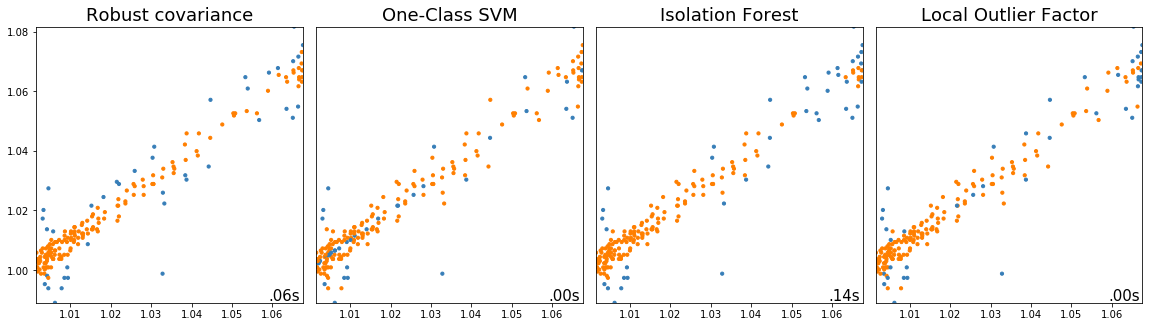

In [2]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))

plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(Y)
    else:
        y_pred = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(Y[:, 0], Y[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(min(Y[:, 0]), max(Y[:, 0]))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

In [3]:
t_vec = []
obs_vc = []
err_vec = []
for data_key in data.keys():
    print(data_key)
    t, _, err = fitter.data[data_key]
    obs = data[data_key][1]
    coeffs, _ = fitter.linear_fit(data_key,fitter.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)
obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)
magl = fitter.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2
Y = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))

KMT-C31-
KMT-A31-
KMT-S31-
OGLE


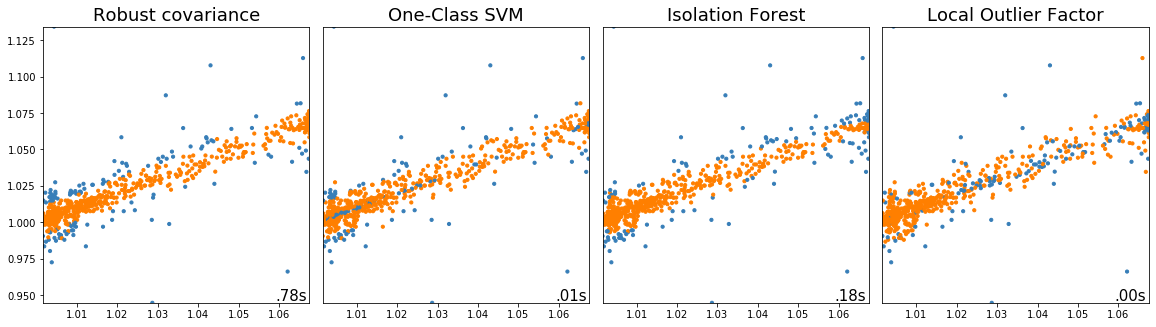

In [4]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))

plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(Y)
    else:
        y_pred = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(Y[:, 0], Y[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(min(Y[:, 0]), max(Y[:, 0]))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

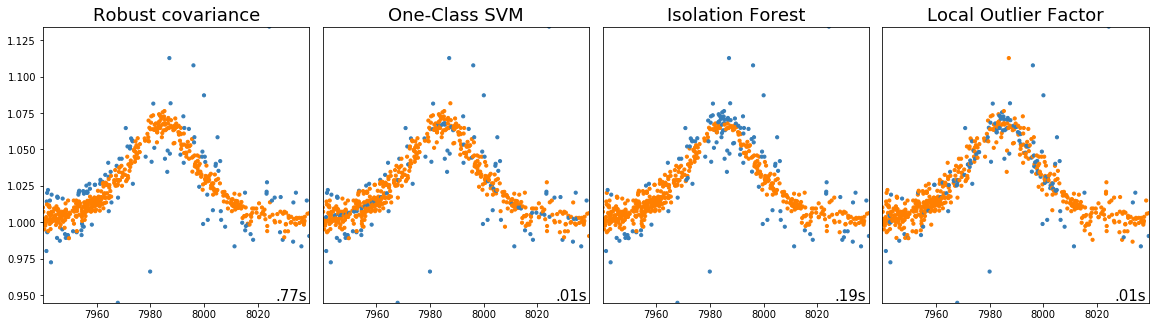

In [5]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))
y_pred={}
plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred[name] = algorithm.fit_predict(Y)
    else:
        y_pred[name] = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(t_vec, Y[:, 1], s=10, color=colors[(y_pred[name] + 1) // 2])

    plt.xlim(min(t_vec), max(t_vec))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

In [6]:
name = [None] * len(y_pred.keys())
for i,names in enumerate(y_pred.keys()):
    name[i] = names 

In [7]:
test = np.c_[y_pred[name[0]], y_pred[name[1]],y_pred[name[2]],y_pred[name[3]]]

In [8]:
y_abs = np.sum((test+1)//2,axis=1)<=2

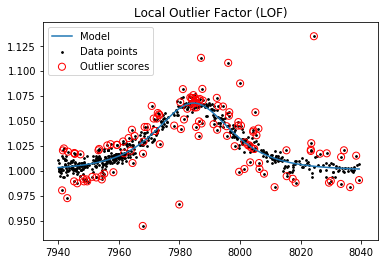

In [9]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Y[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_abs], Y[y_abs, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl, label='Model')
plt.axis('tight')
legend = plt.legend(loc='upper left')
plt.show()

In [10]:
y_int = y_abs.astype(int)

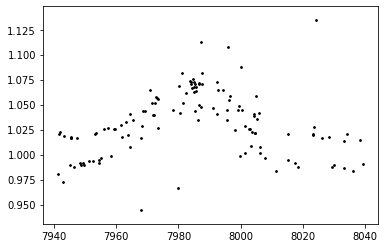

In [11]:
plt.scatter(t_vec[y_int==1], Y[y_int==1, 1], color='k', s=3., label='Data points')

In [12]:
sum(y_int==1)/sum(y_int==0)

0.2504970178926441

In [17]:
number = (8040-7940)//1
t_int = np.linspace(7940,8040,number)
y_rm = np.interp(t_int,t_vec[y_int==0],Y[y_int==0, 1])
y_fit = fitter.magnification(t_int)
y_data = np.interp(t_int,t_vec,Y[:, 1])
np.corrcoef(y_rm, y_data)

array([[1.        , 0.96001189],
       [0.96001189, 1.        ]])

In [18]:
C_0 = np.corrcoef(y_fit, y_data)

In [19]:
C = np.corrcoef(y_fit, y_rm)

In [20]:
(C-C_0)/C_0

array([[0.        , 0.03594466],
       [0.03594466, 0.        ]])

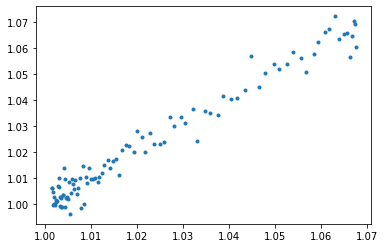

In [21]:
plt.plot(y_fit, y_rm,'.')

In [22]:
bindata = read('./bin1/',t_range=(7800,7950),max_uncertainty=1)
binfitter = slf(bindata,[4.366,7884.99, 6.197])
t_vec = []
obs_vc = []
err_vec = []
for data_key in bindata.keys():
    print(data_key)
    t, _, err = binfitter.data[data_key]
    obs = bindata[data_key][1]
    coeffs, _ = binfitter.linear_fit(data_key,binfitter.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)
obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)
magl = binfitter.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2
Y = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))

Reading data:
['OGL-2017-BLG-0812.dat']
Using OGLE as reference.
OGLE


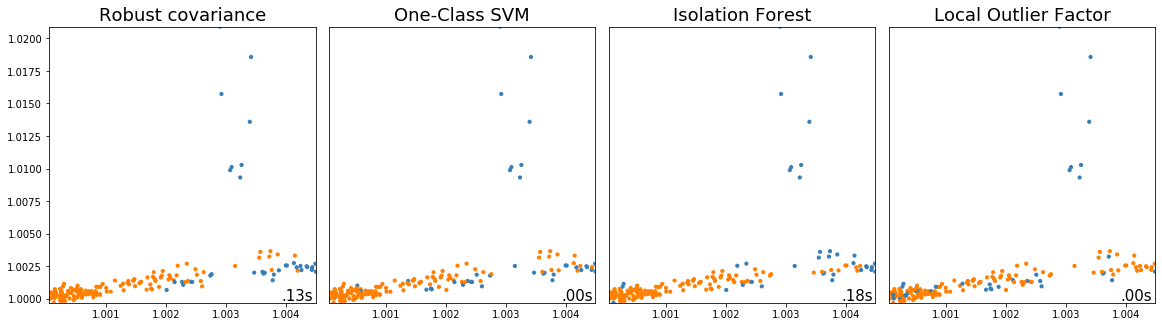

In [23]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))

plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(Y)
    else:
        y_pred = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(Y[:, 0], Y[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(min(Y[:, 0]), max(Y[:, 0]))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

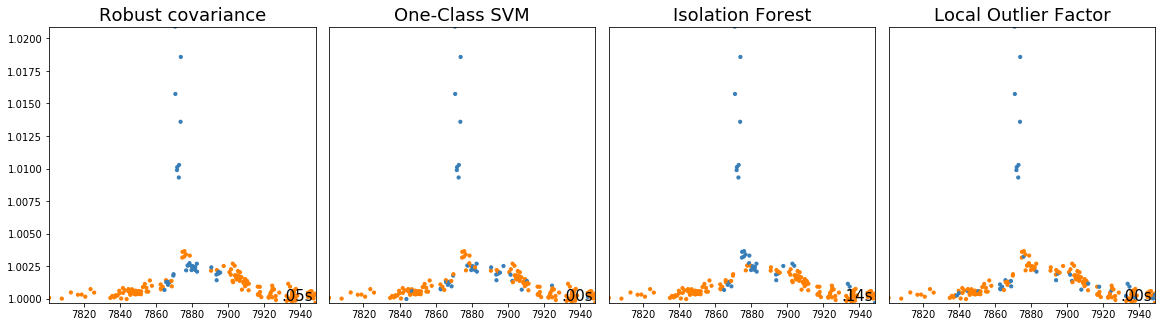

In [24]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))
y_pred={}
plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred[name] = algorithm.fit_predict(Y)
    else:
        y_pred[name] = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(t_vec, Y[:, 1], s=10, color=colors[(y_pred[name] + 1) // 2])

    plt.xlim(min(t_vec), max(t_vec))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

In [25]:
name = [None] * len(y_pred.keys())
for i,names in enumerate(y_pred.keys()):
    name[i] = names 

In [26]:
test = np.c_[y_pred[name[0]], y_pred[name[1]],y_pred[name[2]],y_pred[name[3]]]
y_abs = np.sum((test+1)//2,axis=1)<=2

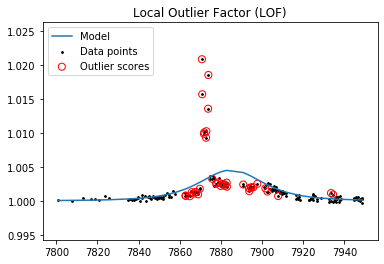

In [27]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Y[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_abs], Y[y_abs, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl, label='Model')
plt.axis('tight')
legend = plt.legend(loc='upper left')
plt.show()

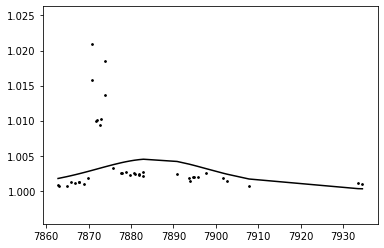

In [28]:
y_int = y_abs.astype(int)
plt.scatter(t_vec[y_int==1], Y[y_int==1, 1], color='k', s=3., label='Data points')
plt.plot(t_vec[y_int==1], Y[y_int==1, 0], color='k', label='model')

In [30]:
sum(y_int==1)/sum(y_int==0)

0.29411764705882354

In [34]:
number = (7950-7800)//1
t_int = np.linspace(7800,7950,number)
y_rm = np.interp(t_int,t_vec[y_int==0],Y[y_int==0, 1])
y_data = np.interp(t_int,t_vec,Y[:, 1])
y_fit = binfitter.magnification(t_int)
np.corrcoef(y_rm, y_data)

array([[1.        , 0.65185702],
       [0.65185702, 1.        ]])

In [35]:
C_0 = np.corrcoef(y_fit, y_data)

In [36]:
C = np.corrcoef(y_fit, y_rm)

In [37]:
(C-C_0)/C_0

array([[0.        , 0.64780309],
       [0.64780309, 0.        ]])

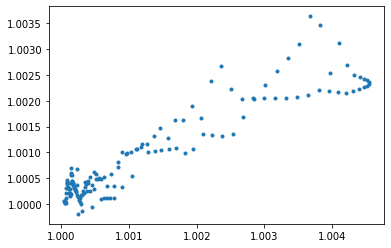

In [38]:
plt.plot(y_fit, y_rm,'.')

In [39]:
bindata = read('./bin2/',t_range=(7875,8025),max_uncertainty=1)
binfitter = slf(bindata,[0.27,7947.29, 20.33])
t_vec = []
obs_vc = []
err_vec = []
for data_key in bindata.keys():
    print(data_key)
    t, _, err = binfitter.data[data_key]
    obs = bindata[data_key][1]
    coeffs, _ = binfitter.linear_fit(data_key,binfitter.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)
obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)
magl = binfitter.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2
Y = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))

Reading data:
['KMT-C11-OGL-2017-BLG-1170.dat', 'KMT-S11-OGL-2017-BLG-1170.dat', 'OGL-2017-BLG-1170.dat', 'KMT-CV-OGL-2017-BLG-1170.dat', 'KMT-A11-OGL-2017-BLG-1170.dat']
Using KMT-C11- as reference.
KMT-C11-
KMT-S11-
OGLE
KMT-CV-O
KMT-A11-


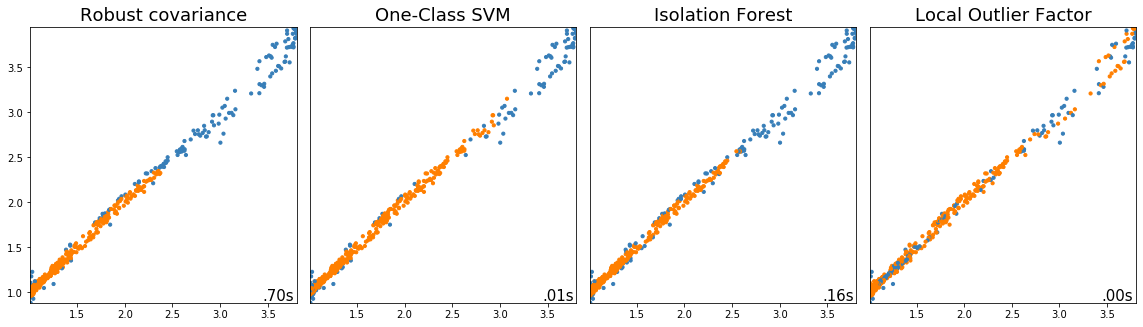

In [40]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))

plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(Y)
    else:
        y_pred = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(Y[:, 0], Y[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(min(Y[:, 0]), max(Y[:, 0]))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

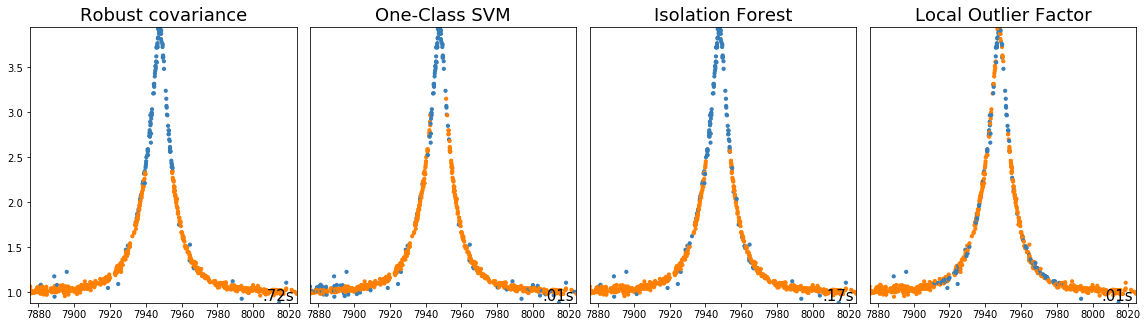

In [41]:

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = len(t)
outliers_fraction = 0.20
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=20, contamination=outliers_fraction))]
# Compare given classifiers under given settings
#xx, yy = np.meshgrid(np.linspace(min(Y[:, 0]), max(Y[:, 0]), 150),np.linspace(min(Y[:, 1]), max(Y[:, 1]), 150))
y_pred={}
plt.figure(figsize=(16, 4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(Y)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred[name] = algorithm.fit_predict(Y)
    else:
        y_pred[name] = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    #if name != "Local Outlier Factor":  # LOF does not implement predict
    #    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
    #    Z = Z.reshape(xx.shape)
    #    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(t_vec, Y[:, 1], s=10, color=colors[(y_pred[name] + 1) // 2])

    plt.xlim(min(t_vec), max(t_vec))
    plt.ylim(min(Y[:, 1]), max(Y[:, 1]))
    if plot_num>1:
        plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
    plot_num += 1

plt.show()

In [42]:
name = [None] * len(y_pred.keys())
for i,names in enumerate(y_pred.keys()):
    name[i] = names 

In [43]:
test = np.c_[y_pred[name[0]], y_pred[name[1]],y_pred[name[2]],y_pred[name[3]]]
y_abs = np.sum((test+1)//2,axis=1)<=2

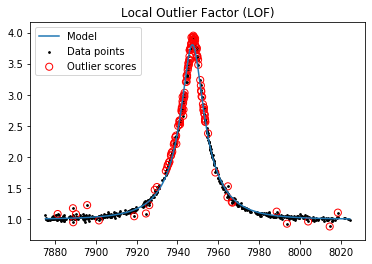

In [44]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Y[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_abs], Y[y_abs, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl, label='Model')
plt.axis('tight')
legend = plt.legend(loc='upper left')
plt.show()

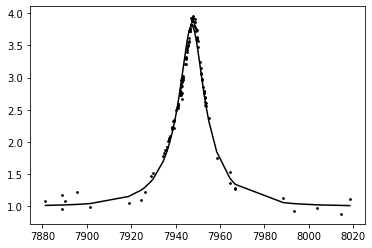

In [45]:
y_int = y_abs.astype(int)
plt.scatter(t_vec[y_int==1], Y[y_int==1, 1], color='k', s=3., label='Data points')
plt.plot(t_vec[y_int==1], Y[y_int==1, 0], color='k', label='model')

In [46]:
sum(y_int[235:577]==1)/sum(y_int[235:577]==0)

0.5267857142857143

In [50]:
number = (8025-7875)//1
t_int = np.linspace(7875,8025,number)
y_rm = np.interp(t_int,t_vec[y_int==0],Y[y_int==0, 1])
y_fit = binfitter.magnification(t_int)
y_data = np.interp(t_int,t_vec,Y[:, 1])

In [51]:
np.corrcoef(y_rm, y_data)

array([[1.        , 0.96012682],
       [0.96012682, 1.        ]])

In [52]:
C_0 = np.corrcoef(y_fit, y_data)

In [53]:
C = np.corrcoef(y_fit, y_rm)

In [54]:
(C-C_0)/C_0

array([[ 0.        , -0.03816261],
       [-0.03816261,  0.        ]])

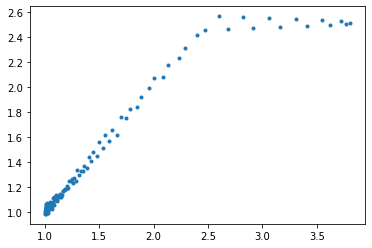

In [55]:
plt.plot(y_fit, y_rm,'.')